• 사용 가능 라이브러리
- pandas, numexpr, matplotlib, scipy, seaborn, scikit-learn, scikit-image, sympy, cython, patsy,
 statsmodel, cloudpickle, dill, numba, bokeh, sqlalchemy, hdf5, vincent, beautifulsoup, protobuf, xlrd packa

In [54]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings 

## EDA

In [55]:
data = pd.read_csv('../farmbot/data_2.csv')
df = data.copy()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,Null,NaN,360,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1.0,Urban,Y


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null object
LoanAmount           594 non-null object
Loan_Amount_Term     602 non-null object
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 62.4+ KB


데이터수는 생각보다 많지 않음, 결측값 있어보임, object가 대부분

In [57]:
# 타겟 변수 고유값
print(np.unique(tot['Loan_Status']))
# 타겟 변수의 고유값과 타겟==Y의 비율을 계산한다
tot['Loan_Status'] = tot['Loan_Status'].map({'Y': 1 ,'N' : 0})
print(1.0 * sum(tot['Loan_Status'])/tot.shape[0])

NameError: name 'np' is not defined

In [58]:
# 타겟변수 고유값
df['Loan_Status'].unique()
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})
print(sum(df['Loan_Status'])/len(df['Loan_Status']))

0.6872964169381107


Y 의 값이 대체로 많다

In [6]:
# 수치형변수/ 범주형변수
num_cols = [col for col in tot.columns if tot[col].dtype in ['int64','float64']]
tot[num_cols].describe()

,ApplicantIncome,Credit_History,Loan_Status
count,614.000000,564.000000,614.000000
mean,5403.459283,0.842199,0.687296
std,6109.041673,0.364878,0.463973
min,150.000000,0.000000,0.000000
25%,2877.500000,1.000000,0.000000
50%,3812.500000,1.000000,1.000000
75%,5795.000000,1.000000,1.000000
max,81000.000000,1.000000,1.000000


### ApplicantIncome

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,Null,NaN,360,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1.0,Urban,1


/home/vips/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vips/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


6.539513113994625 60.54067593369113


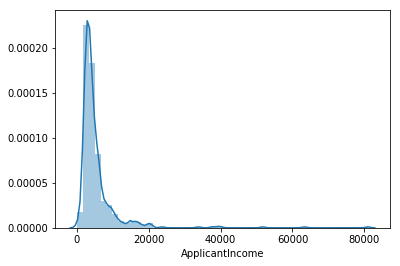

In [60]:
#histogram
sns.distplot(df['ApplicantIncome'])
print(df['ApplicantIncome'].skew(),df['ApplicantIncome'].kurt())

In [59]:
print(df['ApplicantIncome'].skew(),df['ApplicantIncome'].kurt())

6.539513113994625 60.54067593369113


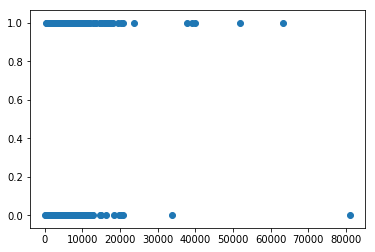

In [30]:
fig, ax = plt.subplots()

ax.scatter(x=df['ApplicantIncome'], y=df['Loan_Status'])
plt.show()

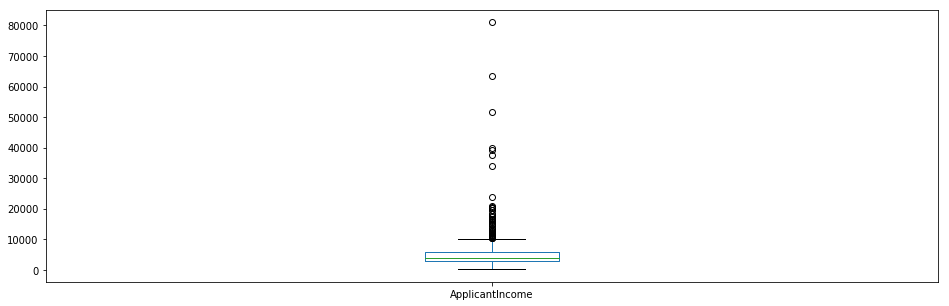

In [9]:
tot["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

왼쪽으로 치우친 분포, 첨도와 왜도가 높다 40000, 60000, 80000 지점 부근에 분포가 조금 있다 -> 고객소득수준 군집
정규분포를 따르지 않기때문에 예측이 안될 확률이 높다 -> 조치 필요
소득수준에 아웃라이어가 많이 보인다 소득수준을 구분짓는 노력이 필요해보인다

- 정규분포를 만들기위해 Log를 취할수 있다

가정 : 소득이 높은 사람일수록 대출 상환확률이 높다
    -> 대출 상환된사람의 평균소득과 그렇지 않은 사람들의 평균소득을 비교하자
    - 통계적 증명을 해보자

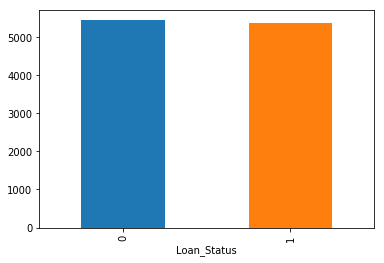

In [61]:
df.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar()

평균소득간의 비교를 할수 없다
구간을 정할 필요가 있어보인다..
- 4분위수로 구분을 지어보자

In [62]:
tot['ApplicantIncome'].describe()

NameError: name 'tot' is not defined

In [63]:
def crosstab_plot(x,df):
    f, ax = plt.subplots(1, 2, figsize=(15, 8))
    df[x].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
    ax[0].set_ylabel('Count')
    sns.countplot(x, hue='Loan_Status', data=df, ax=ax[1])
    ax[1].set_title(x+': Loan_Status')
    plt.show()
def target_ratio(x):
    a = df[[x, 'Loan_Status']].groupby([x], as_index=False).mean().sort_values(by=x, ascending=False)
    return a
def cate_plot(x,df):
    plt.rcParams['figure.figsize'] = (20, 6)
    plt.suptitle(x, fontsize=10)
    sns.countplot(x=x, data=df)
    plt.show()

In [64]:
cutline=[150,2877.5,3812.5,5795,81000]
group=['25%','50%','75%', '75+%']
df['Income_cut']=pd.cut(df['ApplicantIncome'],cutline,labels=group)

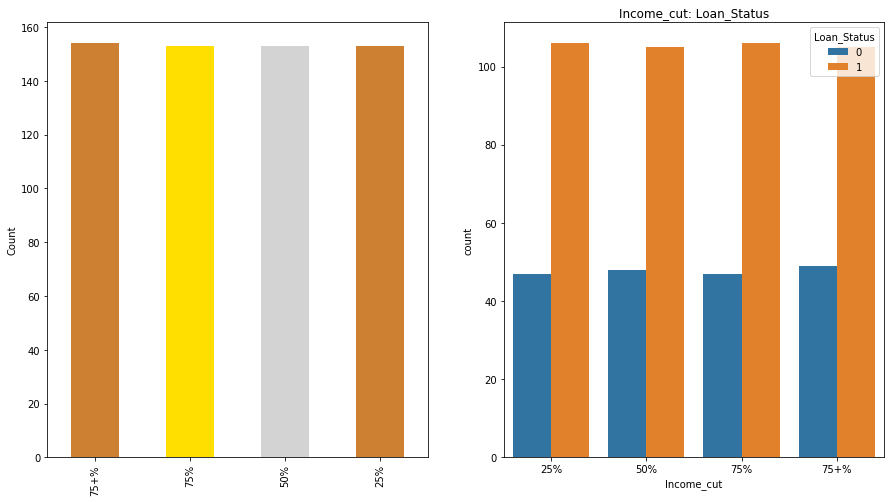

,Income_cut,Loan_Status
3,75+%,0.681818
2,75%,0.692810
1,50%,0.686275
0,25%,0.692810


In [65]:
crosstab_plot('Income_cut',df)
target_ratio('Income_cut')

In [71]:
# the "C" indicates categorical data
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('Loan_Status ~ C(Income_cut)', df).fit()

print(anova_lm(model))

                  df      sum_sq   mean_sq         F    PR(>F)
C(Income_cut)    3.0    0.013315  0.004438  0.020558  0.995996
Residual       609.0  131.474450  0.215886       NaN       NaN


/home/vips/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/vips/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/vips/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


고객소득별로 대출상환확률에 영향을 미치지 않는다고 추론할 수 있다.
또한 통계적 유의수준0.05에서도 증명이 된다

### Credit_History

In [15]:
tot[num_cols[1]].unique()

array([ 1.,  0., nan])

은행가이드라인에 부합한 신용기록, 0,1의 object변수로 변환해야함, nan값이 있음

In [72]:
df['Credit_History'] = df['Credit_History'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null object
LoanAmount           594 non-null object
Loan_Amount_Term     602 non-null object
Credit_History       614 non-null object
Property_Area        614 non-null object
Loan_Status          614 non-null int64
Income_cut           613 non-null category
dtypes: category(1), int64(2), object(11)
memory usage: 63.2+ KB


### 범주형변수분석 

In [74]:
cat_cols = [col for col in df.columns if df[col].dtype in ['object']]
df[cat_cols].describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614,601,611,599,614,582,614,594,602,614,614
unique,614,2,2,4,2,2,288,204,11,3,3
top,LP001608,Male,Yes,0,Graduate,No,0,120,360,1.0,Semiurban
freq,1,489,398,345,480,500,268,20,512,475,233


Loan_ID : 은행고객고유ID, 중복고객없음
몇몇 변수에 결측값들이 보인다
- CoapplicantIncome	LoanAmount	이경우 unique값의 빈도가 너무많다 numeric하지않을까?

### Gender

In [91]:
def cate_plot(x,tot):
    plt.rcParams['figure.figsize'] = (20, 6)
    plt.suptitle(x, fontsize=10)
    sns.countplot(x=x, data=tot)
    plt.show()

결측값이 존재, 남자가 월등히 많은 분포

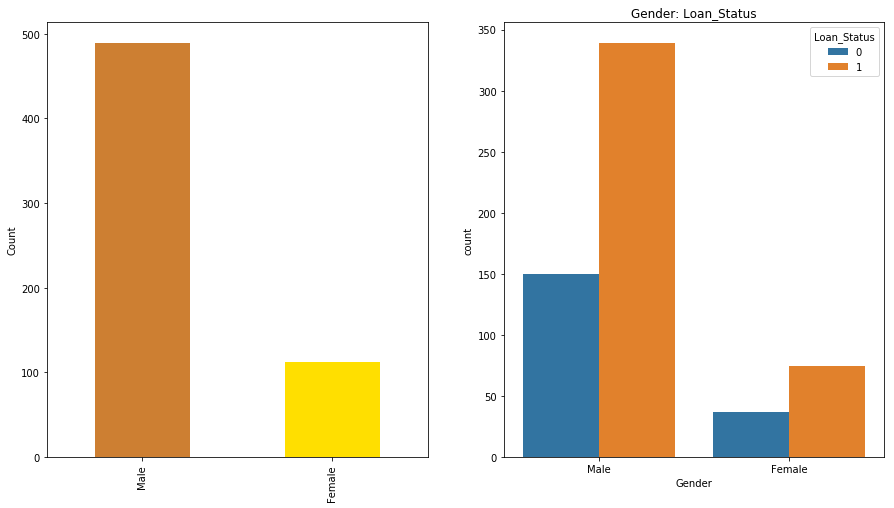

,Gender,Loan_Status
1,Male,0.693252
0,Female,0.669643


In [93]:
crosstab_plot('Gender',df)
target_ratio('Gender')

In [94]:
# the "C" indicates categorical data
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('Loan_Status ~ C(Gender)', df).fit()

print(anova_lm(model))

              df      sum_sq   mean_sq        F    PR(>F)
C(Gender)    1.0    0.050792  0.050792  0.23628  0.627084
Residual   599.0  128.764516  0.214966      NaN       NaN


/home/vips/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/vips/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/vips/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


남자가 여자보다 많은 분포, 대출상환에 있어서는 남자가 조금더 확률이 높음 -> 별로 그렇게 영향이 없음

### Married

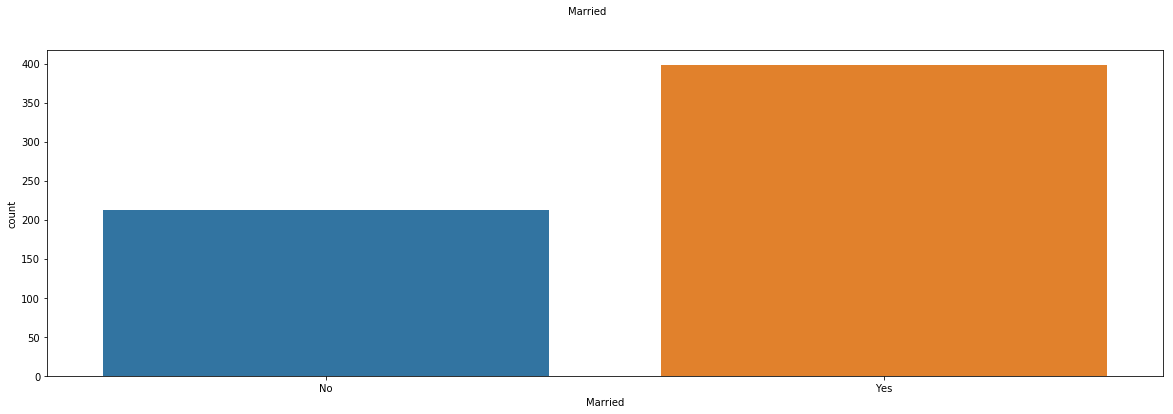

In [22]:
cate_plot('Married',tot)

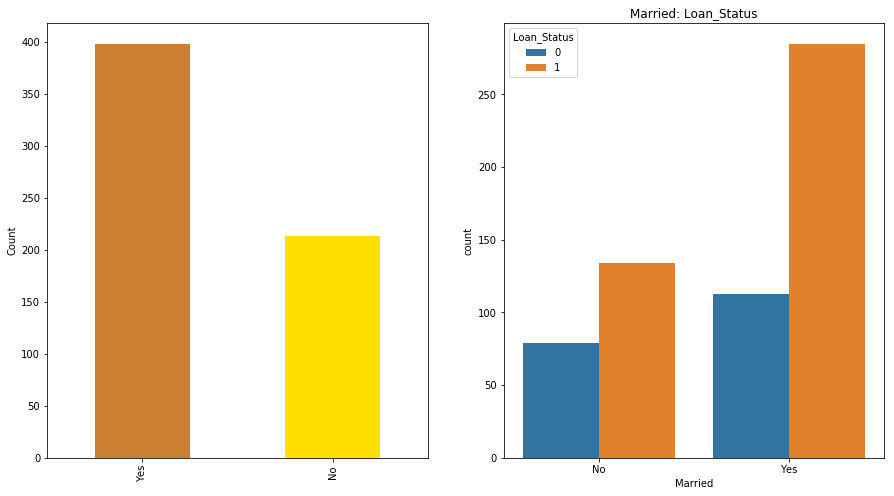

In [23]:
crosstab_plot('Married',tot)

In [24]:
target_ratio('Married')

,Married,Loan_Status
1,Yes,0.716080
0,No,0.629108


In [95]:
# the "C" indicates categorical data
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('Loan_Status ~ C(Married)', df).fit()

print(anova_lm(model))

               df      sum_sq   mean_sq         F    PR(>F)
C(Married)    1.0    1.049505  1.049505  4.893318  0.027331
Residual    609.0  130.616616  0.214477       NaN       NaN


/home/vips/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/vips/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/vips/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


결측값존재하고, 결혼한 고객이 많다. 결혼한고객일수록 대출상환 높다

### Dependents	

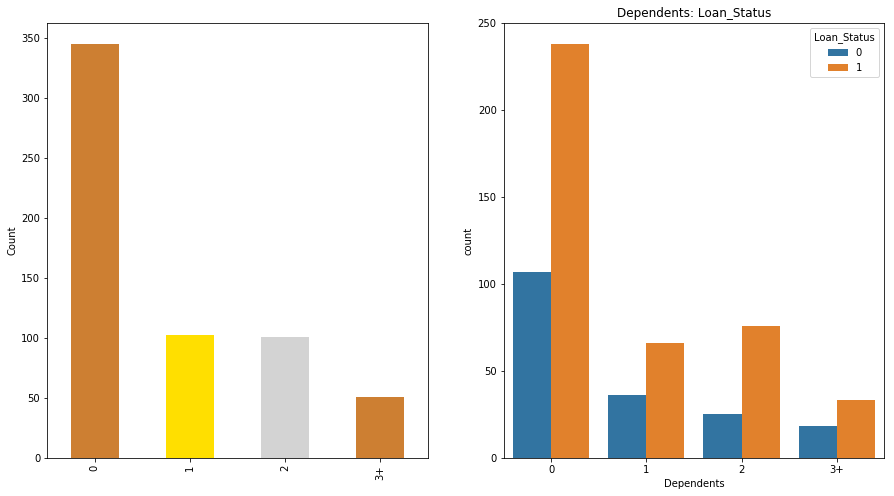

,Dependents,Loan_Status
3,3+,0.647059
2,2,0.752475
1,1,0.647059
0,0,0.689855


In [96]:
crosstab_plot('Dependents',df)
target_ratio('Dependents')

피부양자수 결측값있음 0이 가장많고 1,2는 비슷한 수, 2명인경우가 대출상환확률이 높다 -> 
이변수는 ordinal 하다
- 3이상인경우 빈도도 적고 큰영향이 없으니 3으로 mapping해도 무관할듯


### Education

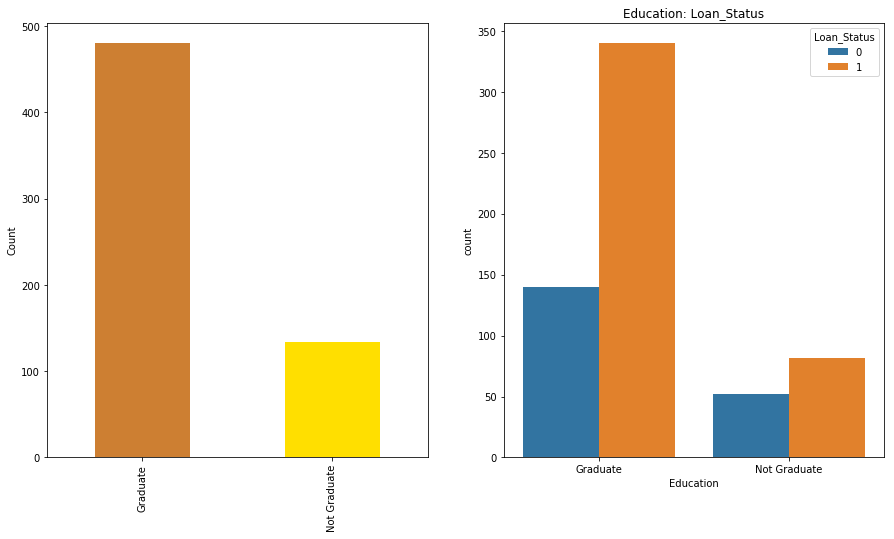

,Education,Loan_Status
1,Not Graduate,0.611940
0,Graduate,0.708333


In [26]:
crosstab_plot('Education',tot)
target_ratio('Education')

결측값없음, 졸업한 고객이 더많고, 졸업한고객이 대출상환 확률이 높다

### Self_Employed

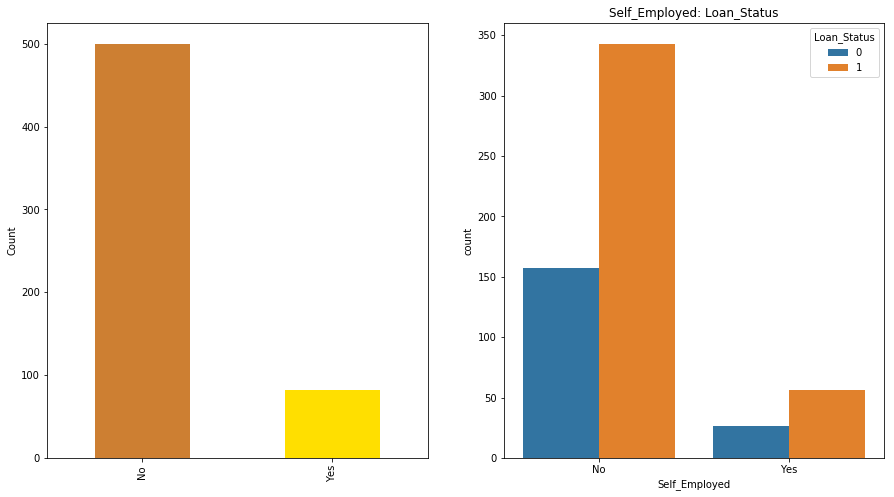

,Self_Employed,Loan_Status
1,Yes,0.682927
0,No,0.686000


In [27]:
crosstab_plot('Self_Employed',tot)
target_ratio('Self_Employed')

자영업자의 경우 아닌비율이 훨신높았지만 둘의 대출상환확률은 관계가 없어보인다

### CoapplicantIncome

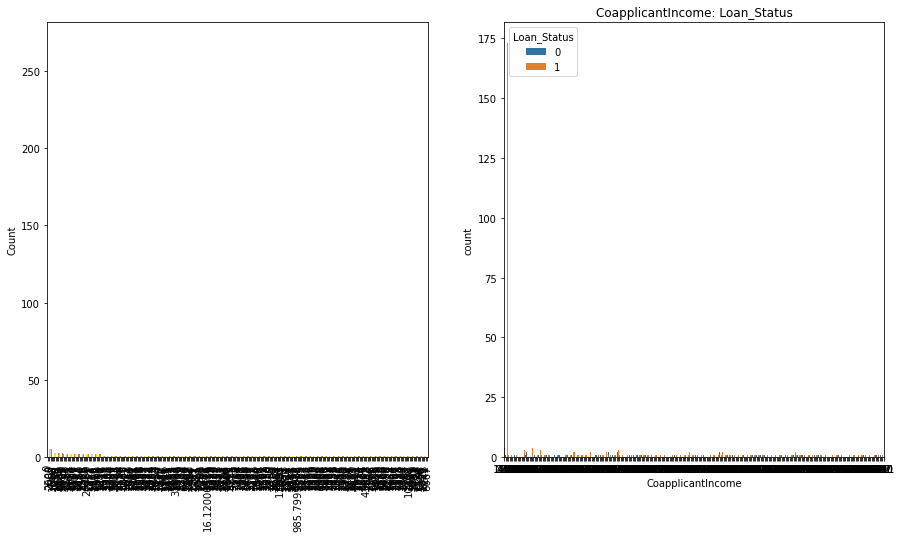

,CoapplicantIncome,Loan_Status
287,Null,0.800000
286,997,1.000000
285,985.7999878,1.000000
284,983,1.000000
283,923,1.000000
282,913,1.000000
281,8980,1.000000
280,8333,1.000000
279,830,1.000000
278,8106,1.000000


In [75]:
crosstab_plot('CoapplicantIncome',df)
target_ratio('CoapplicantIncome')

In [29]:
print(len(tot.CoapplicantIncome), len(tot.CoapplicantIncome.unique()))

614 288


수치형으로 변환할 필요가 있어보인다
결측값 null은 아마 가족의 소득이 합쳐지지않은건가? 없고 몇몇 조합소득이 겹쳐있은것 같음 수치형으로 변환하자

공동 신청자의 수입의 대부분은 0에서 5000까지

In [76]:
len(df[df['CoapplicantIncome']=='Null']) # null값이 5개가 있음

5

In [77]:
len(df[df['CoapplicantIncome']=='0']) # 대부분이 공동신청자가 아님

268

In [78]:
df[df['CoapplicantIncome']=='Null']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_cut
0,LP001002,Male,No,0,Graduate,No,5849,Null,NaN,360,1.0,Urban,1,75+%
16,LP001034,Male,No,1,Not Graduate,No,3596,Null,100,240,nan,Urban,1,50%
17,LP001036,Female,No,0,Graduate,No,3510,Null,76,360,0.0,Urban,0,50%
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,Null,125,60,1.0,Urban,1,75+%
113,LP001392,Female,No,1,Graduate,Yes,7451,Null,NaN,360,1.0,Semiurban,1,75+%


공동신청자의 경우 소득도 3510 ~ 7451 로 최빈도부근에 분포한다 추후 분석필요 일단 numeric으로 바꾸자 값은 구분의 편의성을 위해 -1로 지정한다 

In [80]:
df['CoapplicantIncome'].replace('Null','-1',inplace=True)
df['CoapplicantIncome']= df['CoapplicantIncome'].astype('float')

In [82]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.237655
std       2926.252890
min         -1.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [83]:
cutline=[0,1188,2297,41667]
group =['Low','Average','High']
df['CoapplicantIncome_cut']=pd.cut(df["CoapplicantIncome"],cutline,labels=group)

/home/vips/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vips/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


6.539513113994625 60.54067593369113


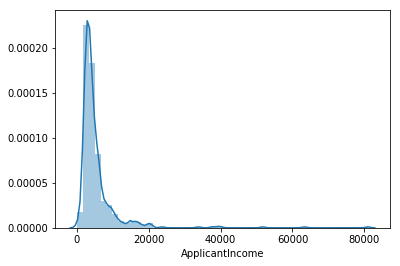

In [85]:
#histogram
sns.distplot(df['ApplicantIncome'])
print(df['ApplicantIncome'].skew(),df['ApplicantIncome'].kurt())

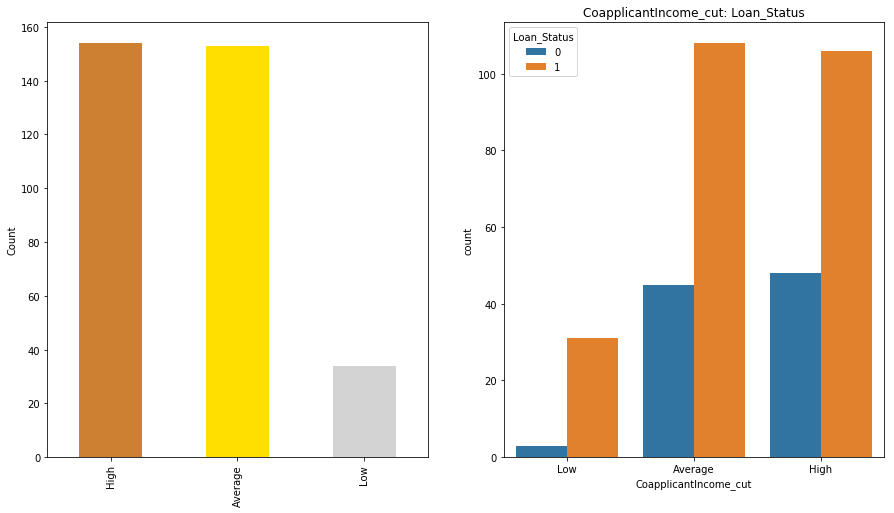

,CoapplicantIncome_cut,Loan_Status
2,High,0.688312
1,Average,0.705882
0,Low,0.911765


In [84]:
crosstab_plot('CoapplicantIncome_cut',df)
target_ratio('CoapplicantIncome_cut')

공통신청자의 경우 low인 그룹이 대출승인이 많아보이지만 이건 잘못됬다 0이 대부분이기 때문에
신청자와 공동신청자의 수입을 결합하여 대출 승인에 대한 수입의 결합 효과를 시각화할 수 있는 새로운 변수를 만들 수 있다.
- Null 값 그냥 최빈값인 0으로 처리해도 가능

In [86]:
df["dfalIncome"]=df["ApplicantIncome"]+df["CoapplicantIncome"]
df['dfalIncome'].describe()

count      614.000000
mean      7024.696938
std       6458.665797
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: dfalIncome, dtype: float64

In [88]:
cutline =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
df["dfalIncome_cut"]=pd.cut(df["dfalIncome"],cutline,labels=group)

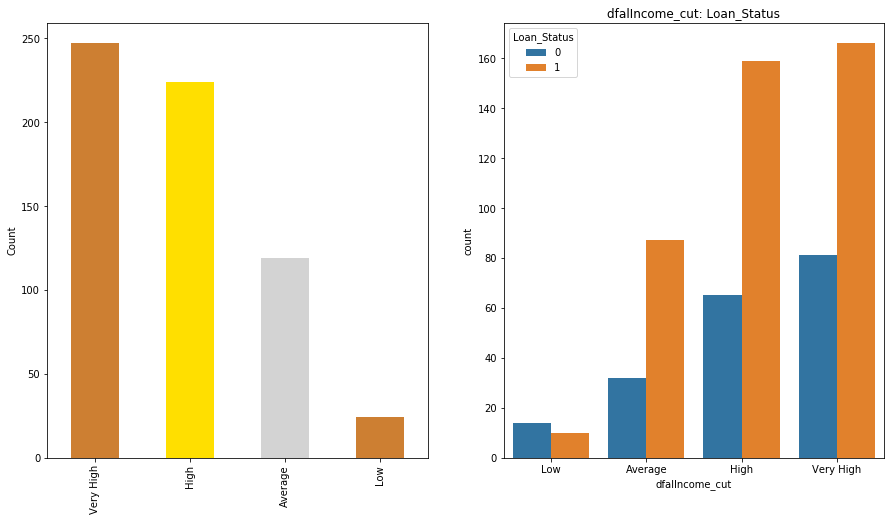

,dfalIncome_cut,Loan_Status
3,Very High,0.672065
2,High,0.709821
1,Average,0.731092
0,Low,0.416667


In [89]:
crosstab_plot('dfalIncome_cut',df)
target_ratio('dfalIncome_cut')

In [90]:
# the "C" indicates categorical data
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('Loan_Status ~ C(dfalIncome_cut)', df).fit()

print(anova_lm(model))

                      df      sum_sq   mean_sq         F    PR(>F)
C(dfalIncome_cut)    3.0    2.156981  0.718994  3.378835  0.018051
Residual           610.0  129.803931  0.212793       NaN       NaN


/home/vips/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/vips/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/vips/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


총소득이 낮은 지원자에 대해 승인을 받는 대출의 비율은 평균, 고소득, 초고소득 지원자에 비해 매우 낮다는 것을 알 수 있다.

### LoanAmount

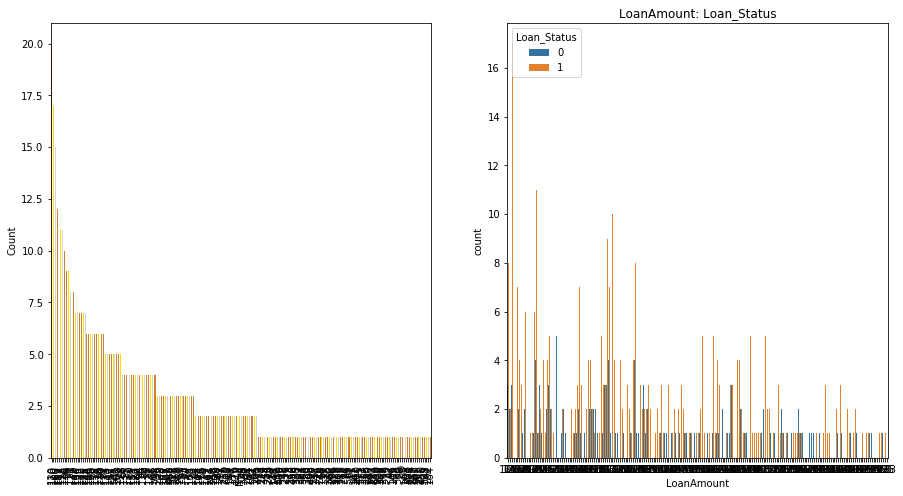

,LoanAmount,Loan_Status
203,Null,0.500000
202,99,0.500000
201,98,0.750000
200,97,1.000000
199,96,0.777778
198,95,0.777778
197,94,0.750000
196,93,0.666667
195,90,0.833333
194,9,0.000000


In [40]:
crosstab_plot('LoanAmount',tot)
target_ratio('LoanAmount')

In [41]:
tot[tot['LoanAmount']=='Null']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_cut,CoapplicantIncome_cut,TotalIncome,TotalIncome_cut
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,Null,360,nan,Urban,0,75+%,NaN,6782.0,Very High
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,Null,360,1.0,Semiurban,1,75%,High,8235.0,Very High


In [42]:
tot['LoanAmount'].replace('Null','-1',inplace=True)
tot['LoanAmount'] =tot['LoanAmount'].astype('float')

대출금액은 numeric한 처리가 필요하다

### Loan_Amount_Term

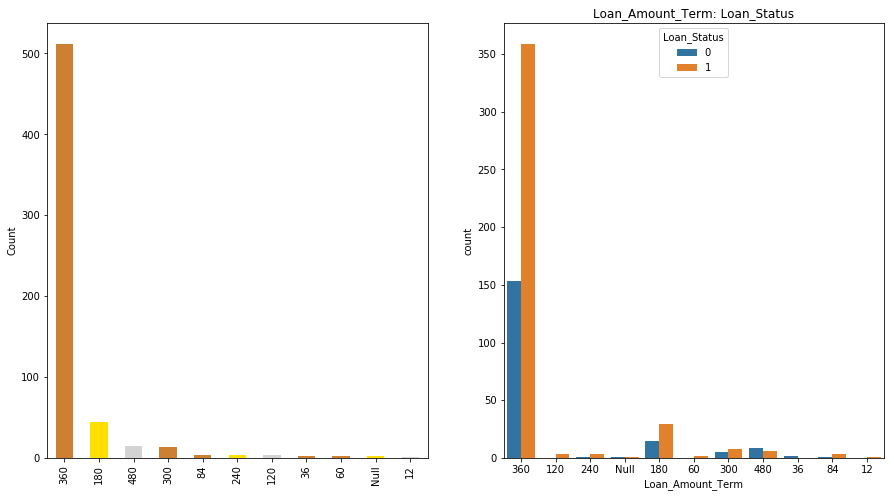

,Loan_Amount_Term,Loan_Status
10,Null,0.500000
9,84,0.750000
8,60,1.000000
7,480,0.400000
6,360,0.701172
5,36,0.000000
4,300,0.615385
3,240,0.750000
2,180,0.659091
1,120,1.000000


In [43]:
crosstab_plot('Loan_Amount_Term',tot)
target_ratio('Loan_Amount_Term')

월별 대출기간 Null값이 포함되어있으며 360이 가장 많지만 의외로 분석해볼 필요가있다

In [44]:
tot[tot['Loan_Amount_Term']=='Null']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_cut,CoapplicantIncome_cut,TotalIncome,TotalIncome_cut
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,Null,1.0,Urban,1,25%,High,6100.0,Very High
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,Null,0.0,Rural,0,50%,High,7686.0,Very High


In [46]:
tot['Loan_Amount_Term'].replace('Null','-1',inplace=True)
tot['Loan_Amount_Term'] =tot['Loan_Amount_Term'].astype('float')

### Property_Area

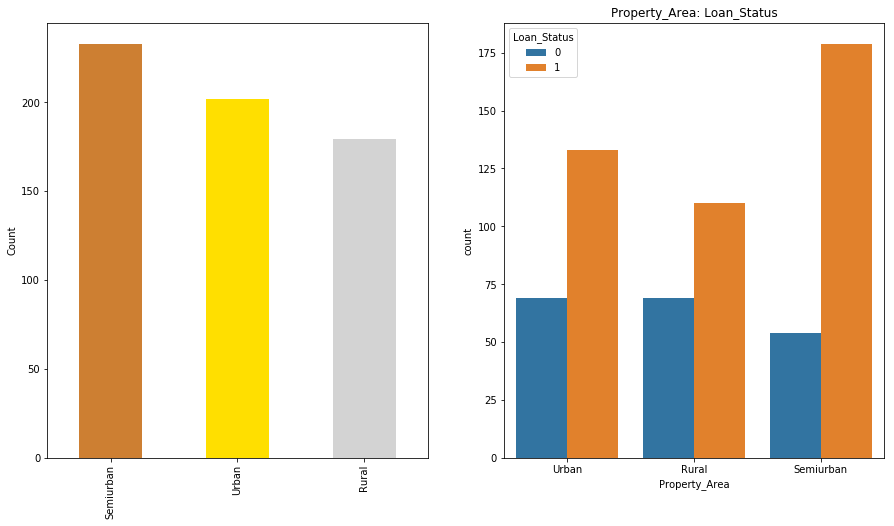

,Property_Area,Loan_Status
2,Urban,0.658416
1,Semiurban,0.768240
0,Rural,0.614525


In [47]:
crosstab_plot('Property_Area',tot)
target_ratio('Property_Area')

도시 시골복합이 가장많고 시골이 가장작다 대출상환도 빈도별로 순위가 같다

## 피쳐 엔지니어링

In [48]:
tot.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_cut,CoapplicantIncome_cut,TotalIncome,TotalIncome_cut
0,LP001002,Male,No,0,Graduate,No,5849,-1.0,NaN,360.0,1.0,Urban,1,75+%,NaN,5848.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,75%,Average,6091.0,Very High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,50%,NaN,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,25%,High,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,75+%,NaN,6000.0,High


In [49]:
tot=tot.drop(["Income_cut","TotalIncome","TotalIncome_cut"],axis=1)
tot.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_cut
0,LP001002,Male,No,0,Graduate,No,5849,-1.0,NaN,360.0,1.0,Urban,1,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,NaN


In [53]:
tot=tot.drop(["CoapplicantIncome_cut"],axis=1)

#### 결측치

In [97]:
df.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                20
Loan_Amount_Term          12
Credit_History             0
Property_Area              0
Loan_Status                0
Income_cut                 1
CoapplicantIncome_cut    273
dfalIncome                 0
dfalIncome_cut             0
dtype: int64

In [51]:
tot["Gender"].fillna(tot["Gender"].mode()[0],inplace=True)
tot["Married"].fillna(tot["Married"].mode()[0],inplace=True)
tot['Dependents'].fillna(tot["Dependents"].mode()[0],inplace=True)
tot["Self_Employed"].fillna(tot["Self_Employed"].mode()[0],inplace=True)
tot["Credit_History"].fillna(tot["Credit_History"].mode()[0],inplace=True)
# 위의 EDA에서 최빈값으로 대체해도 문제 없어보임

In [ ]:
tot["Loan_Amount_Term"].fillna(tot["Loan_Amount_Term"].mode()[0],inplace=True) # 좌측에 치우진 최빈값존재
tot["LoanAmount"].fillna(tot["LoanAmount"].median(),inplace=True) # outlier 때문에 중앙값사용

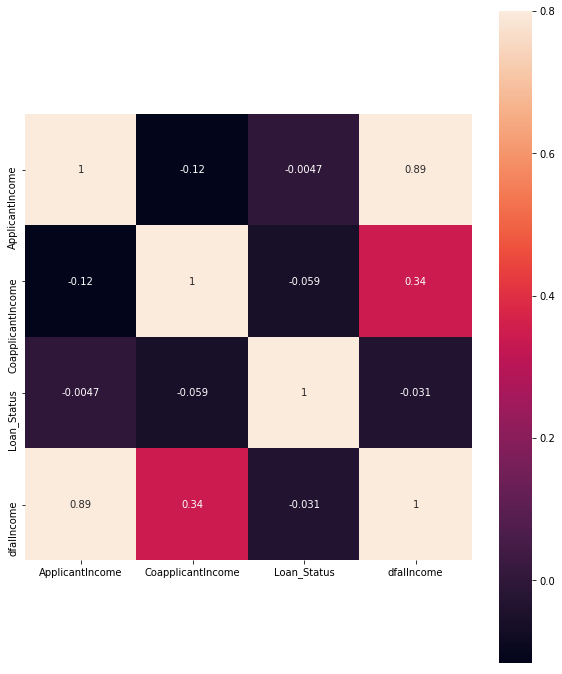

In [98]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True,annot=True);

numeric 데이터간의 상관관계가 그렇게 높지 않다 LoanAmount - ApplicantIncome 같은 경우는 눈여겨 봐야함